In [1]:
%matplotlib inline
# !pip install soundfile
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
import scipy.signal as sig
import scipy
from scipy.fftpack import fft,ifft

# Espectros de sonidos

El [sonido](https://es.wikipedia.org/wiki/Sonido) es la variación de la presión debida a una onda mecánica que se propaga por el aire. Al grabar digitalmente un sonido, se toman muestras cada cierto tiempo $t_s$ (periodo de muestreo) de la vibración captada por un micrófono.

Cuando se escucha una nota de un instrumento musical, se puede aceptar que la señal que llega a los oidos es "periódica" en un lapso definido de tiempo.

Se ha hecho una grabación "corta" de un único sonido "largo" tomando muestras con frecuencia $f_s$.

Puede verificarse la idea de periodicidad graficando la señal grabada.

In [2]:
x, fs = sf.read('datos/JPDP001.wav')# Lee un archivo .wav
x = x.T[0] #Selecciona solo un canal de grabación
sf.write('temp.wav',x,fs)
x

array([ 0.0546875 ,  0.05807495,  0.06161499, ..., -0.09002686,
       -0.10339355, -0.11230469])

Observe que la señal está representada por una lista de números reales.

84992  muestras


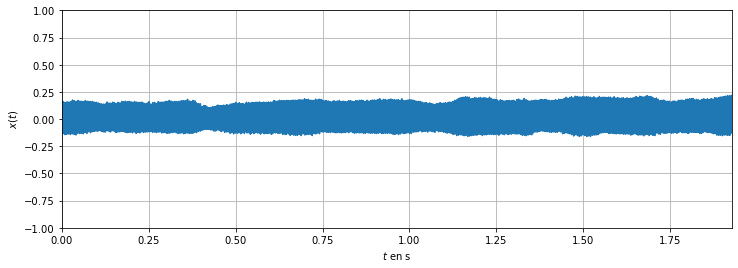

In [3]:
plt.figure(figsize=(12,4))
t = np.arange(len(x)) / fs
plt.plot(t, x)
plt.xlabel(r'$t$ en s')
plt.ylabel(r'$x(t)$')
plt.axis([0, t[-1], -1, 1]);
plt.grid()
print(len(x),' muestras')

La gráfica no muestra detalles que permitan verificar la naturaleza periódica de la señal, por lo cual se grafíca un tramo más corto.

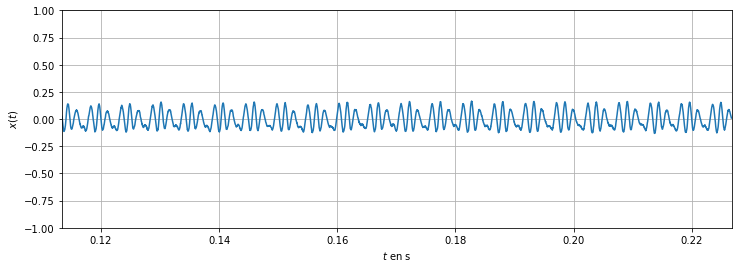

In [4]:
rango = [5000,10000]
plt.figure(figsize=(12,4))
t = np.arange(len(x)) / fs
plt.plot(t[rango[0]:rango[1]], x[rango[0]:rango[1]])
plt.xlabel(r'$t$ en s')
plt.ylabel(r'$x(t)$')
plt.axis([t[rango[0]], t[rango[1]], -1, 1]);
plt.grid()

Aceptando que esta señal es periódica, resulta interesante saber qué "vibraciones puras" componen tal sonido.

Las **series de Fourier** permiten analizar la composición espectral de las señales periódicas de tiempo contínuo, pero este análisis requiere conocer el periodo de la señal que se busca analizar.

La **Transformada de Fourier** permite analizar la composición espectral de las señales no periódicas de tiempo contínuo. La señal que se ha grabado está definida solamente en el lapso de tiempo que dura la grabación, por lo cual esta herramienta puede brindar información sobre la composición espectral de la señal.

La señal que se tiene es una señal de tiempo discreto con un periodo de muestreo $t_s = 1/f_s$. Por esta razón se usará una aproximación de la **Transformada de Fourier** para señales de tiempo discreto denominada **Transformada rápida de Fourier** ([FFT](https://en.wikipedia.org/wiki/Fast_Fourier_transform)). 



In [5]:
nel = len(x)
X_fft = fft(x) # calculate fourier transform (complex numbers list)
f = np.linspace(0,fs,nel)
X_fft

array([ -7.08129883 +0.j        ,  -0.41509783+44.65794406j,
        13.22200913+63.25479389j, ..., -93.82900561+55.91091885j,
        13.22200913-63.25479389j,  -0.41509783-44.65794406j])

Observe que la transformada de Fourier de la señal está representada por una lista de números complejos.

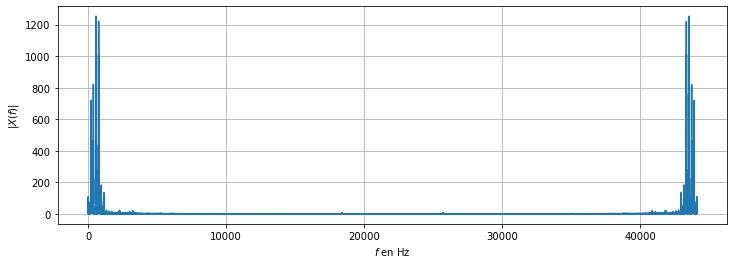

In [6]:
plt.figure(figsize=(12,4))
plt.plot(f,abs(X_fft)) 
plt.xlabel(r'$f$ en Hz')
plt.ylabel(r'$|X(f)|$')
plt.grid()

Debido a las características de las señales de tiempo discreto, existe simetría y periodicidad en los espectros, por lo cual solo se tendrá en cuenta la primera mitad de este.

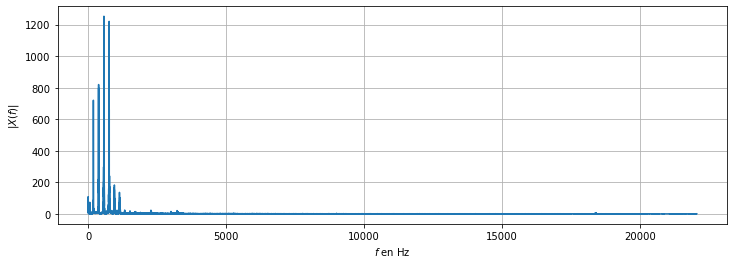

In [7]:
plt.figure(figsize=(12,4))
plt.plot(f[0:round(nel/2)],abs(X_fft[0:round(nel/2)])) 
plt.xlabel(r'$f$ en Hz')
plt.ylabel(r'$|X(f)|$')
plt.grid()



La gráfica no muestra detalles de la composición espectral de la señal, por lo cual se visualizará el espectro hasta una frecuencia apropiada para la visualización.

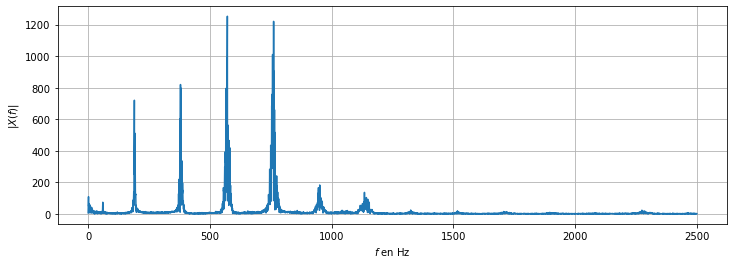

In [8]:
f_max_vis = 2500
plt.figure(figsize=(12,4))
plt.plot(f[f<f_max_vis],abs(X_fft[f<f_max_vis])) 
plt.xlabel(r'$f$ en Hz')
plt.ylabel(r'$|X(f)|$')
plt.grid()

**¿Cómo suena?**

Este es el sonido visualizado [temp.wav](temp.wav)

## Cambios en el espectro

Debido a la dualidad de la **Transformada de Fourier**, se espera que los cambios que se realicen en el dominio de las frecuencuas tengan efecto el el dominio temporal. Recuerde las operaciones equivalentes entre los dos dominios.

Defina una función de transformación a partir de una frecuencia $f_M$ arbitraria.

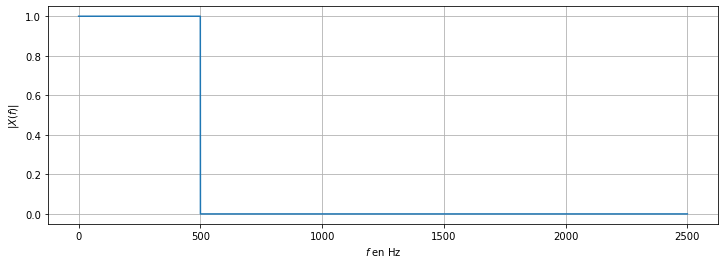

In [9]:
fM = 500
funcion = f*0
for ind,val in enumerate(f):
    if val < fM:
        funcion[ind]=1.0
    else:
        funcion[ind]=0.0
    
funcion = np.flip(funcion) + funcion
plt.figure(figsize=(12,4))
plt.plot(f[f<f_max_vis],abs(funcion[f<f_max_vis])) 
plt.xlabel(r'$f$ en Hz')
plt.ylabel(r'$|X(f)|$')
plt.grid()

Afecte el espectro de la señal con la función que acaba de definir.

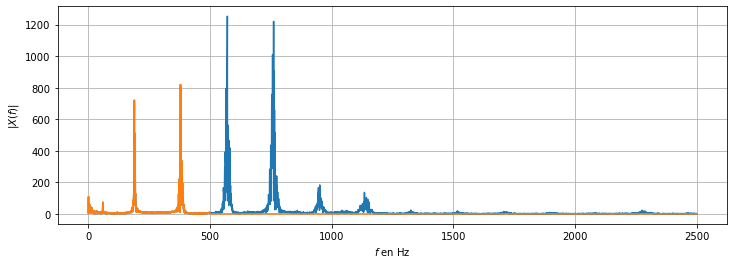

In [10]:
X_procesado_fft = X_fft*funcion
plt.figure(figsize=(12,4))
plt.plot(f[f<f_max_vis],abs(X_fft[f<f_max_vis]),f[f<f_max_vis],abs(X_procesado_fft[f<f_max_vis])) 
plt.xlabel(r'$f$ en Hz')
plt.ylabel(r'$|X(f)|$')
plt.grid()

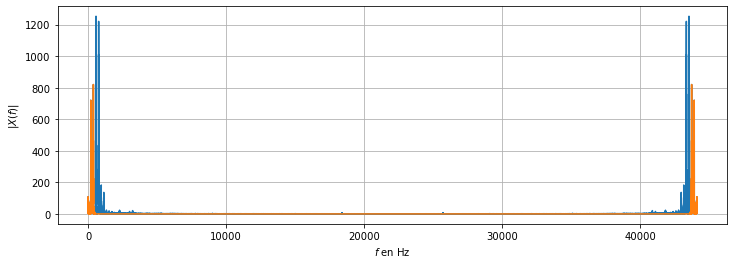

In [11]:
plt.figure(figsize=(12,4))
plt.plot(f,abs(X_fft),f,abs(X_procesado_fft)) 
plt.xlabel(r'$f$ en Hz')
plt.ylabel(r'$|X(f)|$')
plt.grid()

Se lleva el nuevo espectro al dominio del tiempo

In [12]:
x_procesado = ifft(X_procesado_fft)
x_procesado = x_procesado.real
x_procesado
sf.write('temp2.wav',x_procesado,fs)


**¿Cómo suena?**

Este es el sonido visualizado [temp2.wav](temp2.wav)

## Actividad

1. Anallice el espectro de dos sonidos diferetes $x_1$ y $x_2$.
2.Analice el espectro del sonido $x_3$ producido por sumar los dos sonidos anteriores.
3. Cree un filtro que elimine dos armónicos de alta frecuencia que considere relevantes para la señal sumada$x_3$.
4. Analice el efecto del filtro sobre las tres señales $x_1$, $x_2$ y $x_3$.